# Step 1: Import Data and Packages

In [12]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

original_data = pd.read_csv("possum.csv")

original_data.head()

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

### Check columns

In [13]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


### Select Columns and Rows

In [33]:
# keep the columns to be used
filtered_data = original_data[["sex", "age", "totlngth", "taill", "Pop"]]


# Prints ======================

print("\n")
print("filtered_data.shape = ", filtered_data.shape)

print("\n")
print(filtered_data.info())



filtered_data.shape =  (104, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       104 non-null    object 
 1   age       102 non-null    float64
 2   totlngth  104 non-null    float64
 3   taill     104 non-null    float64
 4   Pop       104 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB
None


### Create Binary Outcome "isMale"

In [34]:
# create binary feature isMale

filtered_data["isMale"] = filtered_data["sex"] == "m"

filtered_data["isMale"] = filtered_data["isMale"].map({True: 1, False: 0})

# drop column Type 1 and Type 2 as it is no longer needed
filtered_data = filtered_data.drop("sex", axis=1)

# Prints  ======================

print("\n")
print("filtered_data.shape = ", filtered_data.shape)

print("\n")
print(filtered_data.head())



filtered_data.shape =  (104, 5)


   age  totlngth  taill  Pop  isMale
0  8.0      89.0   36.0  Vic       1
1  6.0      91.5   36.5  Vic       0
2  6.0      95.5   39.0  Vic       0
3  6.0      92.0   38.0  Vic       0
4  2.0      85.5   36.0  Vic       0


In [35]:
print(filtered_data["isMale"].value_counts())

1    61
0    43
Name: isMale, dtype: int64


### Check for missing data

In [36]:
# Check for any missing values
print(filtered_data.isnull().values.any())

# Check number of missing values
print("Count of na's:", filtered_data.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", filtered_data.isna().any(axis=1).sum())

True
Count of na's: 2
Cases with missing values: 2


In [37]:
filtered_data = filtered_data.dropna()

# Check number of missing values
print("Count of na's:", filtered_data.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", filtered_data.isna().any(axis=1).sum())

Count of na's: 0
Cases with missing values: 0


### Train-Test Split Stratified

In [38]:
# import package
from sklearn.model_selection import train_test_split


# declare our X inputs and y outcomes
X = filtered_data.drop("isMale", axis=1)
y = filtered_data["isMale"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (81, 4)
X_test.shape =  (21, 4)
y_train.shape =  (81,)
y_test.shape =  (21,)


y_train class proportions: 
 1    0.580247
0    0.419753
Name: isMale, dtype: float64


y_test class proportions: 
 1    0.571429
0    0.428571
Name: isMale, dtype: float64


### Check the training set for missing values

In [39]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(81, 5)


In [40]:
training_set.describe()

age   totlngth      taill     isMale
count  81.000000  81.000000  81.000000  81.000000
mean    3.975309  87.181481  37.049383   0.580247
std     1.955603   4.146870   1.939080   0.496593
min     1.000000  77.000000  32.000000   0.000000
25%     3.000000  84.000000  36.000000   0.000000
50%     4.000000  87.500000  37.000000   1.000000
75%     5.000000  90.000000  38.000000   1.000000
max     9.000000  96.500000  41.500000   1.000000

---

# Step 2: Exploratory Data Analysis

In [41]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Matrix Heatmap

<AxesSubplot:>

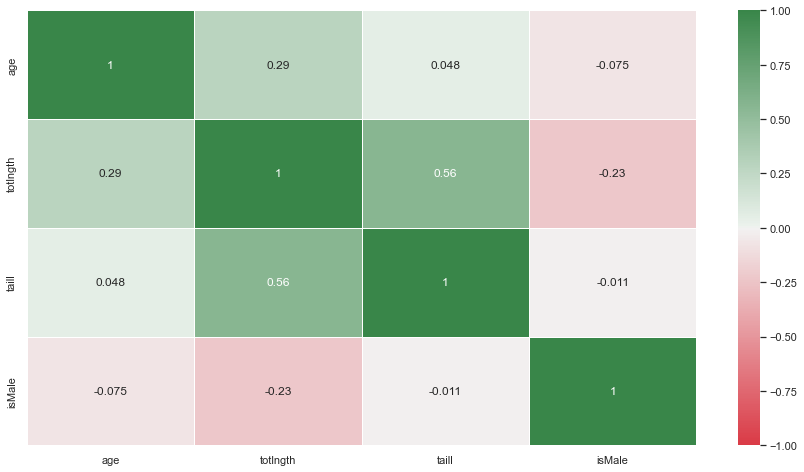

In [42]:
# calculate the correlation matrix
corr_matrix = training_set.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

### Distributions

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'totlngth'}>],
       [<AxesSubplot:title={'center':'taill'}>,
        <AxesSubplot:title={'center':'isMale'}>]], dtype=object)

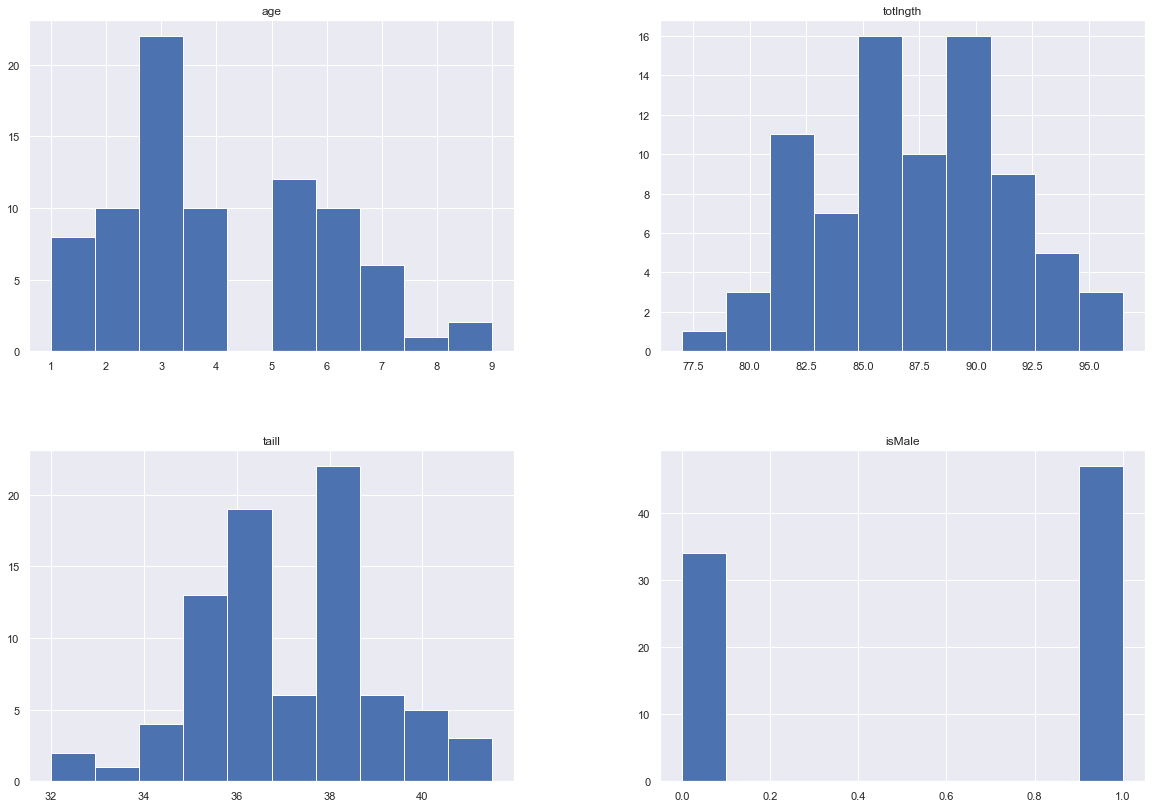

In [43]:
training_set.hist(figsize=(20,14))

### Pairplots

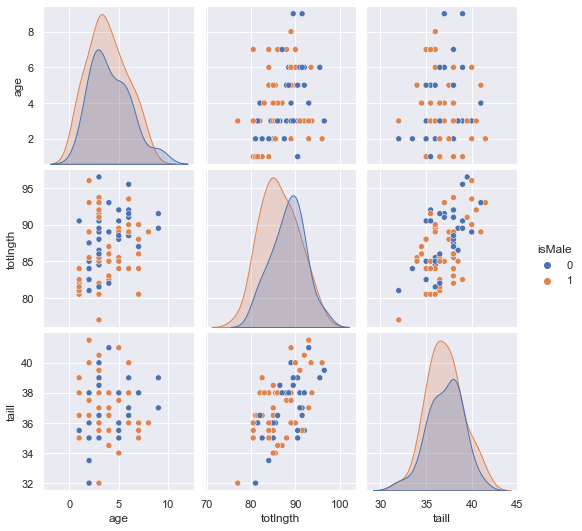

In [44]:
features = ["age", "totlngth", "taill", "Pop", "isMale"]

sns.pairplot(training_set[features],
            hue="isMale")

---

# Step 3: Prepare the Data

### One-Hot Encode Categorical Features

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 61 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       81 non-null     float64
 1   totlngth  81 non-null     float64
 2   taill     81 non-null     float64
 3   Pop       81 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [46]:
# One hot encode categorical features for the X_train and X_test sets

X_train = pd.get_dummies(X_train, columns=['Pop'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Pop'], drop_first=True)

X_train.head()

age  totlngth  taill  Pop_other
61  3.0      90.5   39.0          1
71  1.0      80.5   35.0          1
79  1.0      84.0   38.0          1
19  4.0      89.0   38.0          0
55  3.0      93.7   38.0          1

### Check which features are continuous

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 61 to 65
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        81 non-null     float64
 1   totlngth   81 non-null     float64
 2   taill      81 non-null     float64
 3   Pop_other  81 non-null     uint8  
dtypes: float64(3), uint8(1)
memory usage: 2.6 KB


**Notes for Self:**
    
*Normalization or Min-Max Scaling* 
- The process of scaling data into a range of 0 - 1. 
- It's more useful and common for regression tasks.
- Useful when there are no outliers as it cannot cope up with them. 
- Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.
- It is really affected by outliers.

*Standardization or Z-Score Normalization*
- The process of scaling data so that they have a mean value of 0 and a standard deviation of 1. 
- (Converts to Z-scores where they're units of standard deviation from the mean.)
- It's more useful and common for classification tasks. 
- It is much less affected by outliers.

Sources: 
https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/
https://www.geeksforgeeks.org/normalization-vs-standardization/

### Feature Scaling on Continuous Features with Standardization

In [48]:
# import scaling & column transformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a function to scale the train and test sets

def scaleCategoricalFeatures(X_data):
    

    # Select features to scale
    features = ["age", "totlngth", "taill"]
    
    scaler = StandardScaler()

    X_data[features] = scaler.fit_transform(X_data[features])
    
    return X_data

X_train = scaleCategoricalFeatures(X_train)
X_test = scaleCategoricalFeatures(X_test)

print(X_train.shape)

(81, 4)


In [49]:
# see all columns
pd.set_option('display.max_columns', None)

X_train.head()

age  totlngth     taill  Pop_other
61 -0.501833  0.805233  1.012218          1
71 -1.530907 -1.621250 -1.063469          1
79 -1.530907 -0.771981  0.493296          1
19  0.012705  0.441260  0.493296          0
55 -0.501833  1.581707  0.493296          1

### Make sure it worked by seeing if Standard Deviations are 1

In [50]:
X_train.describe()

age      totlngth         taill  Pop_other
count  8.100000e+01  8.100000e+01  8.100000e+01  81.000000
mean   1.123929e-16 -5.585381e-16  1.766762e-15   0.604938
std    1.006231e+00  1.006231e+00  1.006231e+00   0.491910
min   -1.530907e+00 -2.470518e+00 -2.620234e+00   0.000000
25%   -5.018327e-01 -7.719809e-01 -5.445474e-01   0.000000
50%    1.270462e-02  7.728796e-02 -2.562576e-02   1.000000
75%    5.272419e-01  6.839085e-01  4.932959e-01   1.000000
max    2.585391e+00  2.261122e+00  2.309522e+00   1.000000

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 61 to 65
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        81 non-null     float64
 1   totlngth   81 non-null     float64
 2   taill      81 non-null     float64
 3   Pop_other  81 non-null     uint8  
dtypes: float64(3), uint8(1)
memory usage: 2.6 KB


---

# Step 4: Principal Component Analysis
    
- Feature selection and exploration 

### Conduct PCA for 95% variance

In [23]:
from sklearn.decomposition import PCA

# create instance of PCA with enough features to capture 95% of the variance
pca = PCA(n_components=0.95,
         random_state=42)

# fit PCA model to the scaled data
pca.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.36352435 0.11451153 0.10072787 0.07322482 0.06730468 0.05823753
 0.03731313 0.03478141 0.02530933 0.02350666 0.02075923 0.01498828
 0.01267715 0.01126735]


The first component accounts for about 36% of the variance.

The first two components account for about 48% of the variance.

The first three components account for about 58% of the variance.

For 95% variance, PCA has reduced the 22 features down to 14.

### Components Heatmap

Text(0, 0.5, 'Principal components')

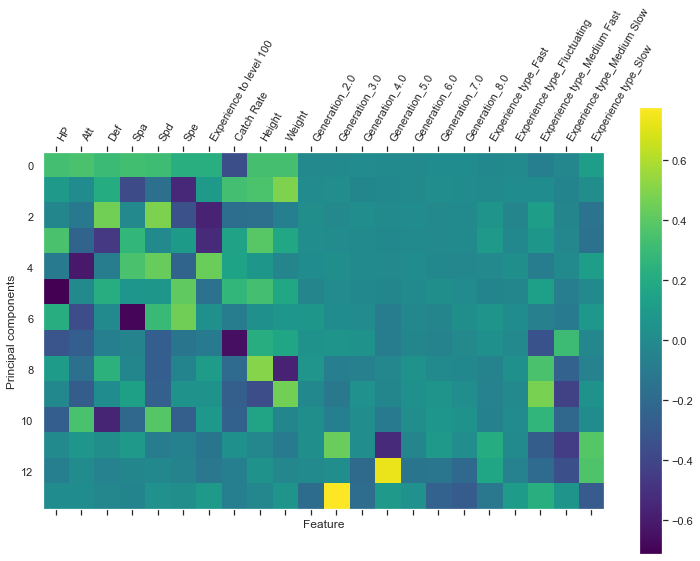

In [24]:
plt.matshow(pca.components_, cmap='viridis')

plt.colorbar()

plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')

# hide overlappint gridlines
plt.grid(b=None)

plt.xlabel("Feature")
plt.ylabel("Principal components")

For the first component, the more extreme features with opposite signs are:
- Postive: The six main stats, Experience to level 100, Height, Weight
- Negative: Catch Rates

Along the "axis" of the first component, the stronger, bigger, and the more effort it takes to train the Pokemon, the harder it is to catch.

---

For the second component, the more extreme features with opposite signs are:
- Positive: Weight, Height, Catch Rate, Defence, and HP
- Negative: Spa, Spd, Spe

Along the "axis" of the second component, the bigger and bulkier a Pokemon's stats, the slower and less "Special" stats they would have. And the smaller and more prone to damage a Pokemon is, the faster and higher "Special" stats they would have".

### Create a PCA train and test sets

- Models will be trained on both for comparisons

In [25]:
# Transform X_sets with PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(785, 14)
(197, 14)


---

# Step 5: Supervised Models

The first algorithm I am using is Gradient Boosted Decision Trees.

They are useful for their feature importance scores. It's helpful for feature selection.

They also might be better than random forests because each "tree" iteration is used to "fix" a previous trees errors.

---

## Model 1: Gradient Boosted Decision Trees

### Gradient Boosted Decision Trees+ Cross Validation Scores

In [26]:
# Create instances of Gradient Boosted Decision Tree --------------------
from sklearn.ensemble import GradientBoostingClassifier

boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)


# Fit both instances ----------------------------------------------------

boosted_tree.fit(X_train, y_train)
boosted_tree_pca.fit(X_train_pca, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(boosted_tree, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(boosted_tree_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9299363057324841

Mean of cv_scores (with pca): 0.932484076433121


It seems with PCA, performance on the training set has slightly increased.

### Visualize Feature Importance

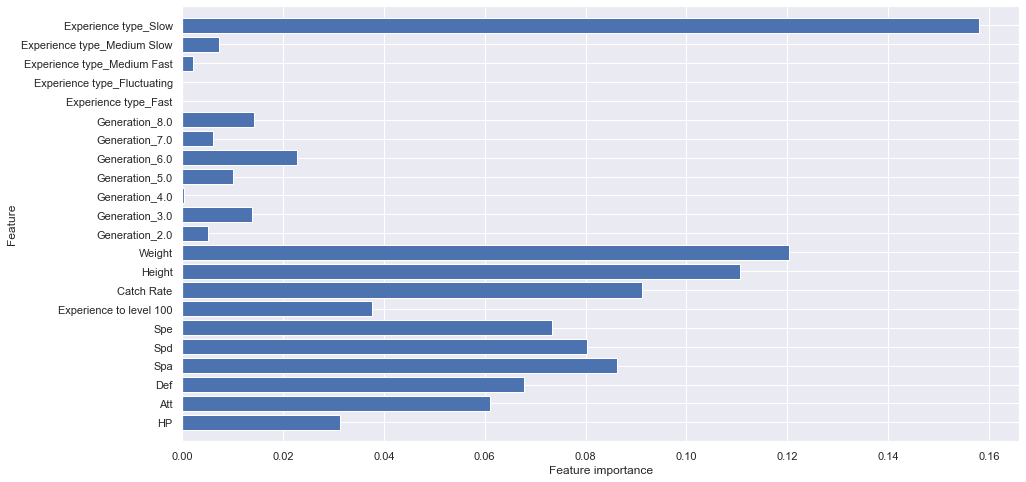

In [27]:
def plot_feature_importances(model, X_data, isPCA):
    
    n_features = X_data.shape[1]
    
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    if not isPCA:
        plt.yticks(np.arange(n_features), X_data.columns)
    
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model = boosted_tree, 
                         X_data = X_train, 
                         isPCA = False)

According to the Gradient Boosted Decision Tree, "Generation" is not very important when predicting isDragon.

And it seems the only experience type that is important for predicting isDragon is "Slow," which is also the most important.

### Remove the features that have the lowest feature importance

- Less importance may mean the features are just adding noise, so removing them may increase performance.

In [28]:
# Remove unwanted features and unwanted components

features_to_drop = ["Experience type_Medium Slow", "Experience type_Medium Fast",
                    "Experience type_Fluctuating", "Experience type_Fast",
                    "Generation_7.0", "Generation_5.0",
                    "Generation_4.0", "Generation_2.0"]

X_train = X_train.drop(features_to_drop, axis=1)
X_test = X_test.drop(features_to_drop, axis=1)

print(X_train.shape)
print(X_test.shape)

(785, 14)
(197, 14)


### Run PCA on Reduced Features

In [29]:
from sklearn.decomposition import PCA

# create instance of PCA with enough features to capture 95% of the variance
pca = PCA(n_components=0.95,
         random_state=42)

# fit PCA model to the scaled data
pca.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.39361012 0.12435427 0.10785925 0.07873411 0.07274921 0.06233144
 0.03977139 0.03477839 0.02673412 0.02307319]


### Heatmap of New Components

Text(0, 0.5, 'Principal components')

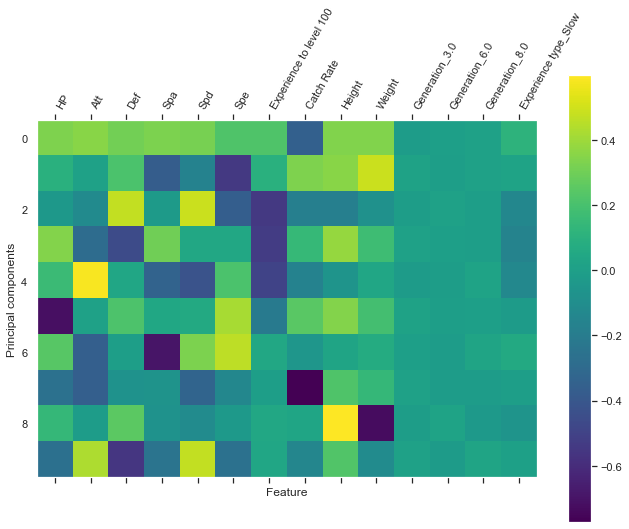

In [30]:
plt.matshow(pca.components_, cmap='viridis')

plt.colorbar()

plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')

# hide overlappint gridlines
plt.grid(b=None)

plt.xlabel("Feature")
plt.ylabel("Principal components")

### Create new PCA Train Test Sets

In [31]:
# Transform X_sets with PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(785, 10)
(197, 10)


### Refit the Gradient Boosted Decision Trees (With the reduced features)


In [32]:
# Create instances of Gradient Boosted Decision Tree --------------------
from sklearn.ensemble import GradientBoostingClassifier

boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree_pca = GradientBoostingClassifier(n_estimators=100, random_state=42)


# Fit both instances ----------------------------------------------------

boosted_tree.fit(X_train, y_train)
boosted_tree_pca.fit(X_train_pca, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(boosted_tree, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(boosted_tree_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9312101910828027

Mean of cv_scores (with pca): 0.9299363057324841


It seems with reduced features, the performance is generally the same, so the removed features did not contribute much to the model.

---

## Model 2: Decision Tree

In [33]:
# Create instances of Decision Trees --------------------

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree_pca = DecisionTreeClassifier(random_state=42)



# Fit both instances ----------------------------------------------------

tree.fit(X_train, y_train)
tree_pca.fit(X_train_pca, y_train)



# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(tree, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(tree_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9031847133757962

Mean of cv_scores (with pca): 0.9095541401273884


It seems Decision Tree does fairly well with slightly reduced performance.

---

## Model 3: Random Forest

In [34]:
# Create instances of Forests --------------------
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest_pca = RandomForestClassifier(random_state=42)


# Fit both instances ----------------------------------------------------
forest.fit(X_train, y_train)
forest_pca.fit(X_train, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(forest, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(forest_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))
print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9414012738853502

Mean of cv_scores (with pca): 0.9337579617834395


---

## Model 4: K-Nearest Neighbors

In [35]:
# Create instances of KNN --------------------
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN_pca = KNeighborsClassifier()


# Fit both instances ----------------------------------------------------
KNN.fit(X_train, y_train)
KNN_pca.fit(X_train_pca, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(KNN, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(KNN_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))
print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9363057324840766

Mean of cv_scores (with pca): 0.9401273885350319


---

## Model 5: Logistic Regression

In [36]:
# Create instances of LogisticRegression --------------------
from sklearn.linear_model import LogisticRegression

log = LogisticRegression().fit(X_train, y_train)
log_pca = LogisticRegression().fit(X_train, y_train)


# Fit both instances ----------------------------------------------------
log.fit(X_train, y_train)
log_pca.fit(X_train, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(log, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(log_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))
print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.935031847133758

Mean of cv_scores (with pca): 0.935031847133758


The similar scores above is odd.

I will check the unique values of the predictions just in case.

(It's to make sure the model isn't predicting all as one class.)

In [37]:
y_pred = log.predict(X_train)

unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts))

{0: 775, 1: 10}

---

## Model 6: Linear Suppor Vector Classifier (SVC or SVM)

In [38]:
# Create instances of linear svm --------------------
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X_train, y_train) 
linear_svm_pca = LinearSVC().fit(X_train, y_train) 


# Fit both instances ----------------------------------------------------
linear_svm.fit(X_train, y_train)
linear_svm_pca.fit(X_train, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(linear_svm, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(linear_svm_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))
print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.935031847133758

Mean of cv_scores (with pca): 0.9337579617834397


---

## Model 7: Kernel SVM

In [39]:
# Create instances of kernel SVM --------------------
from sklearn.svm import SVC

SVM = SVC()
SVM_pca = SVC()

# Fit both instances ----------------------------------------------------
SVM.fit(X_train, y_train)
SVM_pca.fit(X_train, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(SVM, X_train, y_train, cv=sss)
cv_scores_with_pca = cross_val_score(SVM_pca, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))
print("Mean of cv_scores (with pca): {}".format(np.mean(cv_scores_with_pca)))

Mean of cv_scores (regular): 0.9363057324840763

Mean of cv_scores (with pca): 0.9363057324840763


The similar scores above is odd.

I will check the unique values of the predictions just in case.

(It's to make sure the model isn't predicting all as one class.)

In [40]:
y_pred = SVM.predict(X_train)

unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts))

{0: 774, 1: 11}

---

**Mean cross-validation scores of each model (Rounded to three decimal points):**
    
The models have been sorted by mean_cv score of non-pca.

|        **Model** 	| **mean_cv Score** 	|
|-----------------:	|:-----------------:	|
|           forest 	|     **0.941**     	|
|       forest_pca 	|     **0.934**     	|
|              KNN 	|     **0.936**     	|
|          KNN_pca 	|     **0.940**     	|
|              SVM 	|       0.936       	|
|          SVM_pca 	|       0.936       	|
|       linear_svm 	|       0.936       	|
|   linear_svm_pca 	|       0.935       	|
|              log 	|       0.935       	|
|          log_pca 	|       0.935       	|
|     boosted_tree 	|       0.931       	|
| boosted_tree_pca 	|       0.930       	|
|             tree 	|       0.903       	|
|         tree_pca 	|       0.910       	|

- It seems PCA either didn't have much effect on performance or increased performance for most models. 

- The highest increase with PCA was with the Decision Tree model, and it increased performance by 0.007.

- The highest decreased with PCA was with the Random Forest model, and it decreased performance by 0.007.

- It seems the simpler models benefit more from PCA.

- The best model without PCA was the Random Forest model: 0.941

- The best model with PCA was K-Nearest Neighbors: 0.940

### Plot Train Set

Maybe visualizing the data points can help us understand why certain models worked better.

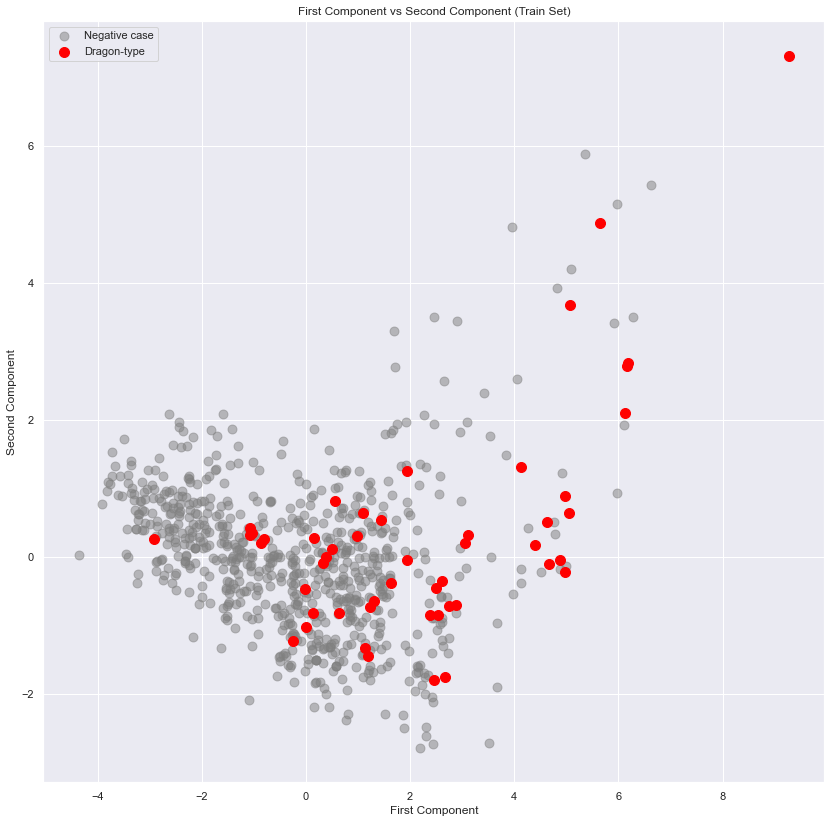

In [42]:
# import packages
import matplotlib.pyplot as plt

# seperate the actual outcomes of 0 and 1
y_0 = y_train == 0
y_1 = y_train == 1

# plot size
plt.figure(figsize=(14,14))

# plot the negative cases
plt.scatter(x=X_train_pca[y_0 ,0], 
            y=X_train_pca[y_0 ,1],
            c="grey", 
            alpha=0.5,
            s=80)

# plot the positive cases
plt.scatter(x=X_train_pca[y_1 ,0], 
            y=X_train_pca[y_1 ,1],
            c="red",
            s=100,
            alpha=1)


# Legends and Titles
plt.legend(["Negative case", 
            "Dragon-type"], 
           loc="best")

plt.title("First Component vs Second Component (Train Set)")
plt.xlabel("First Component")
plt.ylabel("Second Component")

plt.show()

On this plot of the first two components, it seems Dragon-types lean slightly toward the top right corner.

Also, while Dragon-types are not grouped toward any one specific area, it seems there are little groupings of them all over the plot, which might hint as to why K-Nearest Neighbors worked well.

---

# Step 6: GridSearchCV

As Random Forest without PCA and KNN model with PCA performed the best out of all the models, I will test their performance after optimizing parameters with Grid Search.

**Random Forest Parameters**

n_estimators 

- int, default=100

- The number of trees in the forest.

max_features

- {“sqrt”, “log2”, None}, int or float, default=”sqrt”

- The number of features to consider when looking for the best split:

    - Maximum features
    - Amount of randomness (smaller reduces overfitting)

max_depth

- int, default=None

- For pre-pruning

- The maximum depth of the tree. 

- If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Random Forest - GridSearchCV

In [40]:
# CONDUCT GRID SEARCH ---------------------------

from sklearn.model_selection import GridSearchCV

# dictionary of parameters to search
param_grid = {"n_estimators": [50, 100, 200],
             "max_features": ["sqrt", "log2", "None"],
             "max_depth": ["None", 3, 5, 7]}

# grid search on all values of k in dictionary
forest_grid = GridSearchCV(forest, param_grid, cv=5)

forest_grid.fit(X_train, y_train)


# PRINT RESULTS ---------------------------

# best performing (on training set)
print("best params:\n\n", forest_grid.best_params_)

# accuracy of best performing k

print("\nbest score:\n\n", forest_grid.best_score_, "\n\n")

best params:

 {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}

best score:

 0.9388535031847134 




### CrossValidationSSS on Optimized Random Forest

In [41]:
# Create instance of forest_optimized --------------------
from sklearn.ensemble import RandomForestClassifier

forest_optimized = RandomForestClassifier(random_state=42,
                                          max_depth = 5,
                                          max_features = "sqrt",
                                          n_estimators = 50)

# Fit instance ----------------------------------------------------
forest_optimized.fit(X_train, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(forest_optimized, X_train, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

Mean of cv_scores (regular): 0.9401273885350319



Random Forest with default parameters had a mean cv_score of 0.941

Random Forest with optimized parameters had a mean cv_score of 0.940

It seems optmizing parameters did not change much in performance.

---

**KNN Parameters**


n_neighbors

- int, default=5

- Number of neighbors to use by default for kneighbors queries.

weights

- {‘uniform’, ‘distance’} or callable, default=’uniform’

- How we weight each neighbor's vote.

    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

metric

- How we measure the distance between neighbors (Euclidean, Manhattan, etc)

### KNN with PCA - GridSearchCV

In [42]:
# CONDUCT GRID SEARCH ---------------------------

from sklearn.model_selection import GridSearchCV

# dictionary of parameters to search
param_grid = {"n_neighbors": [5, 12, 15, 17, 20],
             "weights": ["uniform", "distance"],
             "metric": ["euclidean", "manhattan"]}

# grid search on all values of k in dictionary
KNN_pca_grid = GridSearchCV(KNN_pca, param_grid, cv=5)

KNN_pca_grid.fit(X_train_pca, y_train)


# PRINT RESULTS ---------------------------

# best performing (on training set)
print("best params:\n\n", KNN_pca_grid.best_params_)

# accuracy of best performing k

print("\nbest score:\n\n", KNN_pca_grid.best_score_, "\n\n")

best params:

 {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

best score:

 0.9375796178343949 




### CrossValidationSSS on Optimized KNN with PCA

In [43]:
# Create instance of KNN_pca_optimized --------------------
from sklearn.neighbors import KNeighborsClassifier

KNN_pca_optimized = KNeighborsClassifier(metric = "manhattan",
                                        n_neighbors = 17,
                                        weights = "uniform")

# Fit instance ----------------------------------------------------
KNN_pca_optimized.fit(X_train_pca, y_train)


# Conduct Cross-Valation with Stratified Shuffle Split -----------------
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores_regular = cross_val_score(KNN_pca_optimized, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores_regular)))

Mean of cv_scores (regular): 0.9363057324840763



KNN with PCA and default parameters had a mean cv_score of 0.940

KNN with PCA and optimized parameters had a mean cv_score of 0.936

It seems optimizing parameters slightly decreased performance.

---

# Test Set Comparison: Evaluation Metrics

I will explore evaluation metrics on these four models:

- Random Forest 

- Random Forest (optimized)

- KNN with PCA 

- KNN with PCA (optimized)

### Random Forest vs Random Forest (optimized)

In [44]:
# CROSS VALIDATION with StratifiedShuffleSplit ------------------------------

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score


sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores = cross_val_score(forest, X_train, y_train, cv=sss)
cv_scores_optimized = cross_val_score(forest_optimized, X_train, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores)))

print("Mean of cv_scores (optimized): {}".format(np.mean(cv_scores_optimized)))



# CONFUSION MATRIX ------------------------------------------------------

# Predictions
y_pred = forest.predict(X_test)
y_pred_optimized = forest_optimized.predict(X_test)

# Confusion Matrix 
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
confusion_optimized = confusion_matrix(y_test, y_pred_optimized)

cmtx = pd.DataFrame(
    confusion, 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)

cmtx_optimized = pd.DataFrame(
    confusion_optimized, 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)

print("\n")
print(cmtx)
print("\n")
print(cmtx_optimized)
print("\n")


# EVALUATION METRICS Precision, Recall, and f1-score ---------------------
from sklearn.metrics import classification_report

print("\nEvaluation Metrics (regular):")
print(classification_report(y_test, 
                            y_pred,
                            target_names=["Not Dragon", "Is Dragon"]))

print("Evaluation Metrics (optimized):")
print(classification_report(y_test, 
                            y_pred_optimized,
                            target_names=["Not Dragon", "Is Dragon"]))

Mean of cv_scores (regular): 0.9414012738853502

Mean of cv_scores (optimized): 0.9401273885350319


         pred: 0  pred: 1
true: 0      183        1
true: 1       11        2


         pred: 0  pred: 1
true: 0      182        2
true: 1       11        2



Evaluation Metrics (regular):
              precision    recall  f1-score   support

  Not Dragon       0.94      0.99      0.97       184
   Is Dragon       0.67      0.15      0.25        13

    accuracy                           0.94       197
   macro avg       0.80      0.57      0.61       197
weighted avg       0.93      0.94      0.92       197

Evaluation Metrics (optimized):
              precision    recall  f1-score   support

  Not Dragon       0.94      0.99      0.97       184
   Is Dragon       0.50      0.15      0.24        13

    accuracy                           0.93       197
   macro avg       0.72      0.57      0.60       197
weighted avg       0.91      0.93      0.92       197



### KNN with PCA vs KNN with PCA (optimized)

In [45]:
# CROSS VALIDATION with StratifiedShuffleSplit ------------------------------

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score


sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

cv_scores = cross_val_score(KNN_pca, X_train_pca, y_train, cv=sss)
cv_scores_optimized = cross_val_score(KNN_pca_optimized, X_train_pca, y_train, cv=sss)

print("Mean of cv_scores (regular): {}\n".format(np.mean(cv_scores)))

print("Mean of cv_scores (optimized): {}".format(np.mean(cv_scores_optimized)))



# CONFUSION MATRIX ------------------------------------------------------

# Predictions
y_pred = KNN_pca.predict(X_test_pca)
y_pred_optimized = KNN_pca_optimized.predict(X_test_pca)

# Confusion Matrix 
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
confusion_optimized = confusion_matrix(y_test, y_pred_optimized)

cmtx = pd.DataFrame(
    confusion, 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)

cmtx_optimized = pd.DataFrame(
    confusion_optimized, 
    index=['true: 0', 'true: 1'], 
    columns=['pred: 0', 'pred: 1']
)

print("\n")
print(cmtx)
print("\n")
print(cmtx_optimized)
print("\n")



# EVALUATION METRICS Precision, Recall, and f1-score ---------------------
from sklearn.metrics import classification_report

print("\nEvaluation Metrics (regular):")
print(classification_report(y_test, 
                            y_pred,
                            target_names=["Not Dragon", "Is Dragon"]))

print("Evaluation Metrics (optimized):")
print(classification_report(y_test, 
                            y_pred_optimized,
                            target_names=["Not Dragon", "Is Dragon"]))

Mean of cv_scores (regular): 0.9401273885350319

Mean of cv_scores (optimized): 0.9363057324840763


         pred: 0  pred: 1
true: 0      180        4
true: 1       10        3


         pred: 0  pred: 1
true: 0      184        0
true: 1       13        0



Evaluation Metrics (regular):
              precision    recall  f1-score   support

  Not Dragon       0.95      0.98      0.96       184
   Is Dragon       0.43      0.23      0.30        13

    accuracy                           0.93       197
   macro avg       0.69      0.60      0.63       197
weighted avg       0.91      0.93      0.92       197

Evaluation Metrics (optimized):
              precision    recall  f1-score   support

  Not Dragon       0.93      1.00      0.97       184
   Is Dragon       0.00      0.00      0.00        13

    accuracy                           0.93       197
   macro avg       0.47      0.50      0.48       197
weighted avg       0.87      0.93      0.90       197



**Random Forest Results:**

- Train set CV score = 0.941
- Test set accuracy = 0.94
- macro precision = 0.80
- macro recall = 0.57
- macro f1-score = 0.61
- Dragons correctly classified = 2

**Random Forest (Optimized) Results:**

- Train set CV score = 0.940
- Test set accuracy = 0.93
- macro precision = 0.72
- macro recall = 0.57
- macro f1-score = 0.60
- Dragons correctly classified = 2

**KNN with PCA Results:**

- Train set CV score = 0.940
- Test set accuracy = 0.93
- macro precision = 0.69
- macro recall = 0.60
- macro f1-score = 0.63
- Dragons correctly classified = 3

**KNN with PCA (Optimized) Results:**

- Train set CV score = 0.936
- Test set accuracy = 0.93
- macro precision = 0.47
- macro recall = 0.50
- macro f1-score = 0.48
- Dragons correctly classified = 0

These final models were about equal in performance, but it seems KNN with PCA and default parameters was the best.

While the default Random Forest model had a higher accuracy of 0.94, with an imbalanced dataset of 93.4% positive cases and 6.6% positive cases, a model can predict all cases as negative and get a high accuracy. It is better to look at the f1-score which takes into account the proportion of postive predictions that were correct (precision) and the proportion of all positive cases that were captured (recall).

---

# Final Result:

Best Model: KNN with PCA and default parameters

This model had:

- The highest macro f1-score of 0.63
- 3 Dragon-types correctly predicted
- 180 non-Dragon-types correctly predicted

---

# Extra Visualization of Test Set and KNN with PCA Predictions

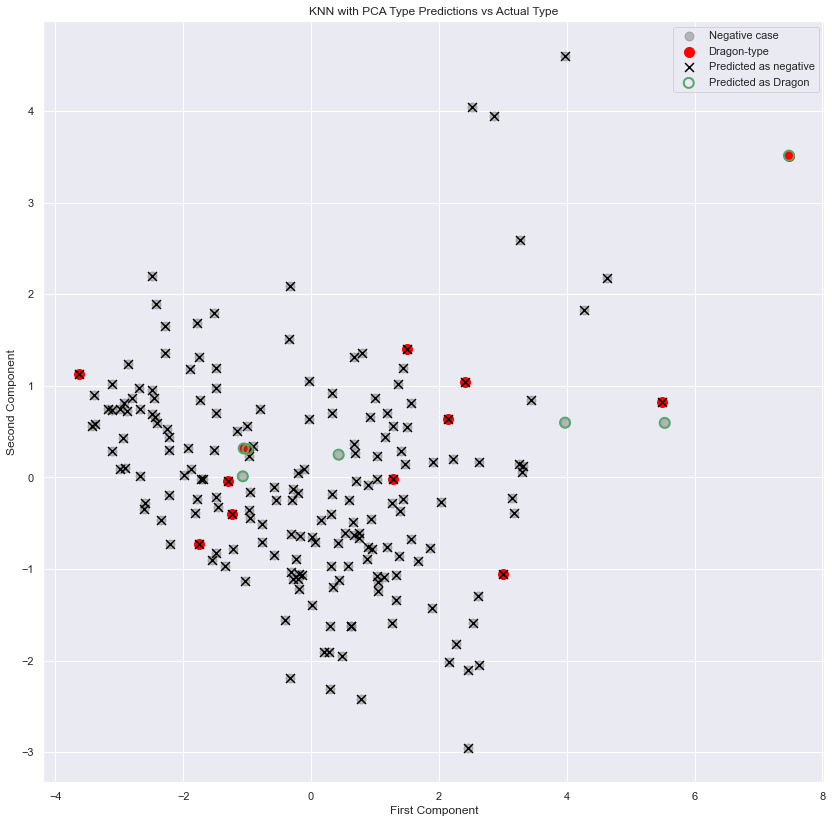

In [193]:
# import packages
import matplotlib.pyplot as plt

# seperate the actual outcomes of 0 and 1
isDragon_0 = y_test == 0
isDragon_1 = y_test == 1

# seperate the predicted outcomes of 0 and 1
y_pred = KNN_pca.predict(X_test_pca)
pred_0 = y_pred == 0
pred_1 = y_pred == 1

# plot size
plt.figure(figsize=(14,14))



# plot the negative cases
plt.scatter(x=X_test_pca[isDragon_0 ,0], 
            y=X_test_pca[isDragon_0 ,1],
            c="grey", 
            alpha=0.5,
            s=80)

# plot the positive cases
plt.scatter(x=X_test_pca[isDragon_1 ,0], 
            y=X_test_pca[isDragon_1 ,1],
            c="red",
            s=100,
            alpha=1)

# plot the negative predictions
plt.scatter(x=X_test_pca[pred_0 ,0], 
            y=X_test_pca[pred_0 ,1],
            c="black",
            marker="x",
            s=80)

# plot the positive predictions
plt.scatter(x=X_test_pca[pred_1 ,0], 
            y=X_test_pca[pred_1 ,1],
            marker="o",
            s=100,
            facecolors='none', 
            edgecolors='g',
            linewidths=2)


# Legends and Titles
plt.legend(["Negative case", 
            "Dragon-type", 
            "Predicted as negative", 
            "Predicted as Dragon"], 
           loc="best")

plt.title("KNN with PCA Type Predictions vs Actual Type")
plt.xlabel("First Component")
plt.ylabel("Second Component")

plt.show()

